In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import analysis
from synchronization import processing
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synchronization by Increase of Coupling Strength between Networks

In [5]:
params = {
  "runtime": 1000.0,

  "J_itoi": 5.0,
  "J_etoe": 0.6,
  "J_etoi": 3.2,
  "J_itoe": 7.0,

  "ou_enabled": [False, False],

  "poisson_enabled": [True, True],
  "poisson_variance": 1.0,
  "poisson_p": 0.5,
  "poisson_size": 800,
  "poisson_mean_input": 600,

   "J_ppee": 0.6,
   "J_ppei": 0.6,

   "const_delay": 0.2,
   "N_pop": 2
}

Initializing net ...
Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
Poisson strength: 0.021666666666666667
Net 2 - rate for single neuron 24.230769230769226
Initialization time: 53.94656991958618s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
==== Network Run Finished ====
runtime: 79.2


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x125f26250>)

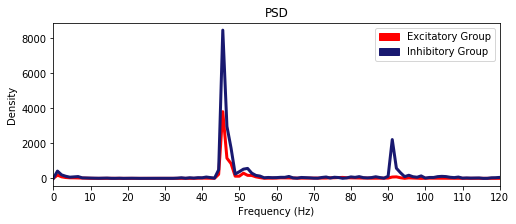

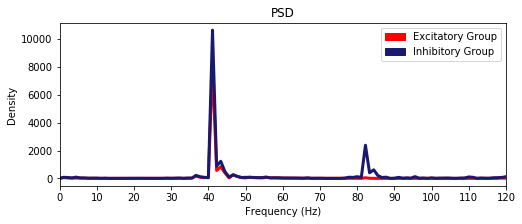

In [6]:
params_mid = dict(params)
params_mid["J_ppee"] = 0.1
params_mid["J_ppei"] = 0.2

synchronized_model = runner.run(
    modified_params=params_mid
)

plots.psd(synchronized_model)
plots.psd(synchronized_model, population=2)

Initializing net ...
Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
Poisson strength: 0.021666666666666667
Net 2 - rate for single neuron 24.230769230769226
Initialization time: 0.516035795211792s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 11.9


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124af79d0>)

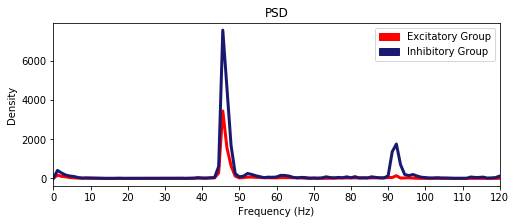

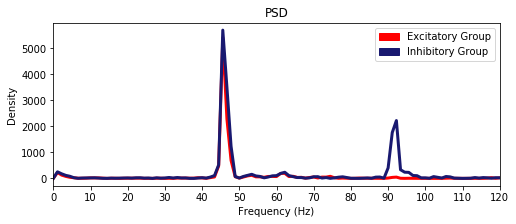

In [7]:
params_mid = dict(params)
params_mid["J_ppee"] = 1.5
params_mid["J_ppei"] = 1.5

synchronized_model = runner.run(
    modified_params=params_mid
)

plots.psd(synchronized_model)
plots.psd(synchronized_model, population=2)

Initializing net ...
Net 1 - poisson rate 27692.30769230769 - single neuron 34.61538461538461
Poisson strength: 0.021666666666666667
Net 2 - rate for single neuron 24.230769230769226
Initialization time: 0.5087108612060547s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 11.6


(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124b80fd0>)

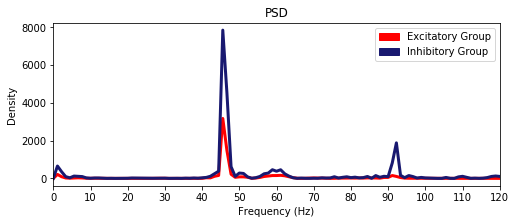

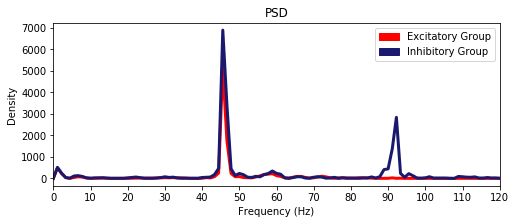

In [8]:
params_mid = dict(params)
params_mid["J_ppee"] = 2.4
params_mid["J_ppei"] = 2.4

synchronized_model = runner.run(
    modified_params=params_mid
)

plots.psd(synchronized_model)
plots.psd(synchronized_model, population=2)

## Exploration

In [9]:
REMOTE = False

default_params = dict(params)
default_params["runtime"] = 500.0
exp_params = {"J_ppee": np.arange(0.0, 2.0, 0.1), "J_ppei": np.arange(0.0, 2.0, 0.1)}

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params,
    default_params=default_params,
    hdf_filename=f"{constants.get_base_path(REMOTE)}/uncorr_synch.h5",
    exploration_name="uncorr_synch_4"
)

In [ ]:
# ex.run()

In [10]:
ex.load_results(all=True)

100%|██████████| 400/400 [00:46<00:00,  8.61it/s]


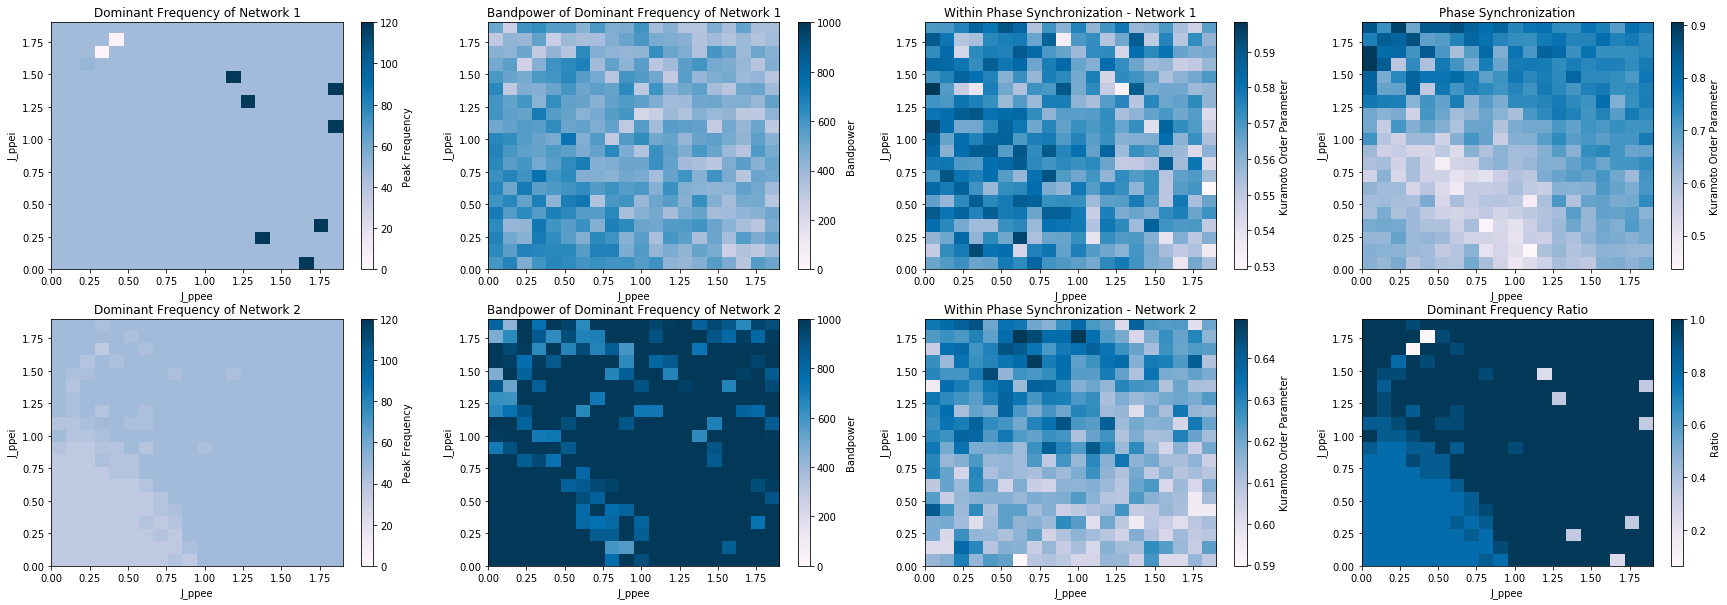

In [11]:
plots.plot_exploration(ex, vmax_phase=None, vmin_phase=None, vmin_ratio=None)